In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
print(np.shape(imagenes), n_imagenes)

(1797, 8, 8) 1797


In [3]:
data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
print(np.shape(data))

(1797, 64)


In [4]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.7)

In [5]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

2


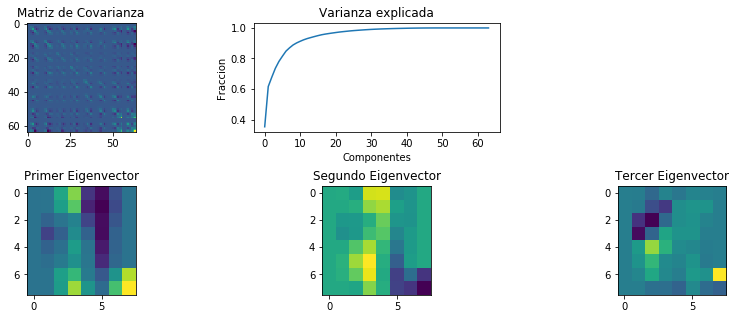

In [6]:
numero = 1
dd = y_train==numero
cov = np.cov(x_train[dd].T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]

plt.figure(figsize=(15,5))
plt.subplot(2,3,1)
plt.title("Matriz de Covarianza")
plt.imshow(cov)

plt.subplot(2,3,2)
plt.title("Varianza explicada")
plt.plot(np.cumsum(valores)/np.sum(valores))
plt.xlabel("Componentes")
plt.ylabel("Fraccion")
max_comps = (np.count_nonzero((np.cumsum(valores)/np.sum(valores))<0.6))
print(max_comps+1) # Necesito este numero de componentes para tener al menos el 60 de la varianza.

plt.subplot(2,3,4)
plt.imshow(vectores[:,0].reshape(8,8))
plt.title('Primer Eigenvector')
plt.subplot(2,3,5)
plt.title('Segundo Eigenvector')
plt.imshow(vectores[:,1].reshape(8,8))
plt.subplot(2,3,6)
plt.title('Tercer Eigenvector')
plt.imshow(vectores[:,2].reshape(8,8))
plt.subplots_adjust(hspace=0.5)

In [7]:
def evaluar_uno(prueba_0):
    
    pc1,pc2,pc3 = np.dot(prueba_0,vectores[:,0]),np.dot(prueba_0,vectores[:,1]),np.dot(prueba_0,vectores[:,2])
    #print(pc1,pc2,pc3)

    mu_dim1 = np.mean(np.matmul(x_train[ii],vectores[:,0]))
    mu_dim2 = np.mean(np.matmul(x_train[ii],vectores[:,1]))
    mu_dim3 = np.mean(np.matmul(x_train[ii],vectores[:,2]))

    sigma_dim1 = np.std(np.matmul(x_train[ii],vectores[:,0]))
    sigma_dim2 = np.std(np.matmul(x_train[ii],vectores[:,1]))
    sigma_dim3 = np.std(np.matmul(x_train[ii],vectores[:,2]))

    cond_1 = pc1<=(mu_dim1+sigma_dim1) and pc1>=(mu_dim1-sigma_dim1)
    cond_2 = pc2<=(mu_dim2+sigma_dim2) and pc2>=(mu_dim1-sigma_dim2)
    cond_3 = pc3<=(mu_dim3+sigma_dim3) and pc3>=(mu_dim1-sigma_dim3)

    return (cond_1 and cond_2 and cond_3)

In [8]:
predicciones = []

for i in x_test:
    predicciones.append(evaluar_uno(i))

In [9]:
from sklearn.metrics import confusion_matrix

[[225 264]
 [ 47   4]]
Correctas:  229 ; Precisión:  0.8272058823529411 ; Cobertura:  0.4601226993865031
[[535 591]
 [127   4]]
Correctas:  539 ; Precisión:  0.8081570996978852 ; Cobertura:  0.47513321492007105


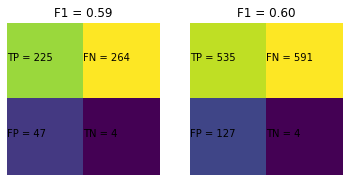

In [11]:
y_binario = y_test==1
predicciones = []

for i in x_test:
    predicciones.append(evaluar_uno(i))
    
matriz = confusion_matrix(y_binario,predicciones)
print(matriz)

P = matriz[0,0]/(matriz[1,0]+matriz[0,0])
R = matriz[0,0]/(matriz[0,1]+matriz[0,0])
F1 = 2*P*R/(P+R)
print('Correctas: ',np.sum(y_binario==predicciones),'; Precisión: ',P,'; Cobertura: ',R)

graficar = matriz*1
plt.subplot(1,2,1)
plt.imshow(graficar)
plt.title(r'F1 = {:.2f}'.format(F1))
plt.text(-0.5,0,'TP = {:.0f}'.format(matriz[0,0]),fontsize=10)
plt.text(-0.5,1,'FP = {:.0f}'.format(matriz[1,0]),fontsize=10)
plt.text(0.5,0,'FN = {:.0f}'.format(matriz[0,1]),fontsize=10)
plt.text(0.5,1,'TN = {:.0f}'.format(matriz[1,1]),fontsize=10)
plt.axis('off')


y_binario = y_train==1
predicciones = []


for i in x_train:
    predicciones.append(evaluar_uno(i))

    
matriz = confusion_matrix(y_binario,predicciones)
print(matriz)

P = matriz[0,0]/(matriz[1,0]+matriz[0,0])
R = matriz[0,0]/(matriz[0,1]+matriz[0,0])
F1 = 2*P*R/(P+R)
print('Correctas: ',np.sum(y_binario==predicciones),'; Precisión: ',P,'; Cobertura: ',R)

graficar = matriz*1

plt.subplot(1,2,2)
plt.imshow(graficar)
plt.title(r'F1 = {:.2f}'.format(F1))
plt.text(-0.5,0,'TP = {:.0f}'.format(matriz[0,0]),fontsize=10)
plt.text(-0.5,1,'FP = {:.0f}'.format(matriz[1,0]),fontsize=10)
plt.text(0.5,0,'FN = {:.0f}'.format(matriz[0,1]),fontsize=10)
plt.text(0.5,1,'TN = {:.0f}'.format(matriz[1,1]),fontsize=10)
plt.axis('off')
plt.savefig('matriz_de_confusion.png')